[View in Colaboratory](https://colab.research.google.com/github/avault/chicago_public_schools/blob/master/analysis_setup.ipynb)

# An Example Analysis

# Setup

In [60]:
palettable.matplotlib.Plasma_10.mpl_colormap

In [56]:
# Here we retrieve code we'll use for our analysis
import numpy as np
import pandas as pd

import analysis_helper

In [59]:
getattr( palettable.matplotlib, '{}_{}'.format( 'Plasma', len( culture_climate_rating_mapping) ) )

In [23]:
# Load the data
combined_df, hs_df = analysis_helper.load_data()

661 school profiles
661 school progress reports


# Exploration

All questions below are ones that students came up with independently, after looking over the information made available.
We then tried to answer quickly use the available data to answer these questions. The results presented here are based on the plots we made with the students, but cleaned up slightly.

## Question: How does the food in CPS impact the students performance in school?

To approach this question, we tried to use [the Healthy CPS certification](https://www.cps.edu/oshw/Pages/HealthyCPSIndicator.aspx) as a measure of the food environment. However...

In [47]:
n_hs_certified = ( hs_df['Healthy_School_Certification'] == 'Achieved' ).sum()
print( '{} high schools have Healthy CPS certifications!'.format( n_hs_certified ) )

0 high schools have Healthy CPS certifications!


As you can see, **no high schools have the Healthy CPS certification**. So we stopped this line of exploration here.

##### Follow-up Questions:

* Why do no high schools have the healthy CPS certification?
* What schools *do* have the healthy CPS certification?
* Are there other measures of food certification?

## Question: Do the academic scores, such as in the NWEA or SAT, correlate with the behavior that the student presents in the academic environment?

To approach this question we used the "Culture Climate Rating" as a measure of student behavior in the academic environment. 
We then compared the Culture Climate Rating with a measure of the school-wide performance on the NWEA math assessment.

The Culture Climate Rating is a score of the school's culture and climate based on the My Voice, My School 5Essentials survey. According to CPS: "For more information on this survey and additional measures of school culture and climate visit [cps.5-essentials.org](https://cps.5-essentials.org/2016)".

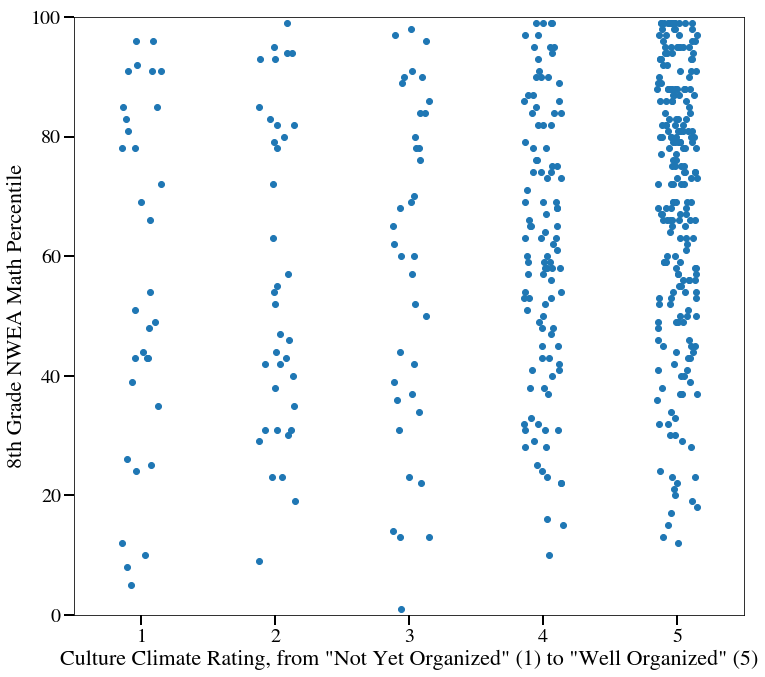

In [113]:
# This maps the qualitative assessment to a quantiative score
culture_climate_rating_mapping = {
    'NOT ENOUGH DATA': -1.,
    'NOT YET ORGANIZED': 1.,
    'PARTIALLY ORGANIZED': 2.,
    'MODERATELY ORGANIZED': 3.,
    'ORGANIZED': 4.,
    'WELL ORGANIZED': 5.,
}
analysis_helper.scatter_plot( 
    combined_df, 
    'Culture_Climate_Rating', 
    'NWEA_Math_Attainment_Grade_8_Pct',
    x_mapping = culture_climate_rating_mapping,
    x_label = 'Culture Climate Rating, from "Not Yet Organized" (1) to "Well Organized" (5)',
    y_label = '8th Grade NWEA Math Percentile',
    jitter = 0.15,
    x_lim = [ 0.5, 5.5 ],
    y_lim = [ 0, 100 ],
)

There doesn't appear to be a strong correlation between school culture and performance on the NWEA math exam. However, there may be some more subtle trends.

##### Follow-up Questions:

* Can we do a more careful job of quantifying to what extent culture and standardized exams are correlated, beyond our estimate by eye?
* Does the lack of a strong correlation between school culture and 

In [13]:
overall_rating_mapping = {
    'INCOMPLETE DATA': -1.,
    'EMERGING': 1.,
    'DEVELOPING': 2.,
    'STRONG': 3.,
    'EXCELLING': 4.,
}
overall_rating_int = []
for rating in combined_df['Creative_School_Certification']:
    overall_rating_int.append( overall_rating_mapping[rating] )
combined_df['Creative_School_Certification_Int'] = np.array( overall_rating_int )

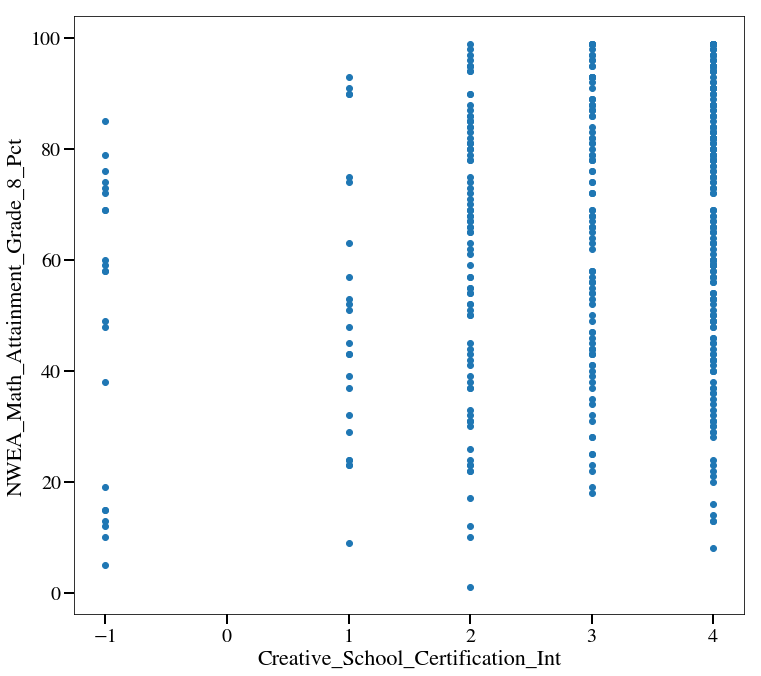

In [14]:
scatter_plot( combined_df, 'Creative_School_Certification_Int', 'NWEA_Math_Attainment_Grade_8_Pct' )